
La forma analitica de las distancias es:

$$D_{A}(z) = \frac{f_{k}(\chi)}{1 + z} , \space D_{L} = (1+z) f_{k}(\chi)$$

donde:
$$ \chi(z) = \int_{0}^{z} \frac{dx}{E(x)} , \space E(z) = \frac{H(z)}{H_{0}}$$

La funcion de curvatura $f_{k}(\chi)$:


$$
f_{k}(\chi) = 
\begin{cases}
\dfrac{c}{H_{0}\sqrt{\Omega_{K,0}}}\;
\sinh\!\Big(\sqrt{\Omega_{K,0}}\;\chi\Big), & \Omega_{K,0} >0 \\
\dfrac{c}{H_{0}}\;\chi & \Omega_{K,0} = 0, \\
\dfrac{c}{H_{0}\sqrt{-\Omega_{K,0}}}\;
\sin\!\Big(\sqrt{-\Omega_{K,0}}\;\chi\Big), & \Omega_{K,0} < 0.

\end{cases}
$$
Con un componente de radiacion, materia, energia oscura (con ecuacion de estado w) y curvatura
$$
H^{2}(z) = H_{0}^{2} \left[ \Omega_{r,0}(1 +z )^{4} + \Omega_{m,0}(1 +z)^{3} + \Omega_{\Lambda,0}(1 +z)^{3(1+\omega)} + \Omega_{K,0}(1+z)^{2}\right]
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
h0 = 67.4
c = 300000          #km/s
w = -1
# omega_k = 0
#omega_r = omega_r*(1 +z)**4 

In [ ]:
def H2_z(z,omega_m, omega_lambda):
    return (h0**2)*(omega_m*(1+z)**3 + (omega_k(omega_m, omega_lambda))*(1 +z)**2 + omega_lambda*(1+z)**(3*(1+w)))

# def d_A(fk,z):
#     return fk/(1+z)

# def d_L(fk,z):
#     return (1 +z)*fk
def omega_k(omega_m, omega_lambda):
    return 1 - omega_m -omega_lambda

def E_z(z,  omega_m, omega_lambda):
    return np.sqrt(H2_z(z, omega_lambda, omega_m))/h0

def chi(z,omega_m, omega_lambda):

    dz = np.diff(z)[-1]
    return np.cumsum(dz/E_z(z, omega_m, omega_lambda))[-1]

def f_k(z, omega_lambda, omega_m):
    

    f = np.zeros(shape=(len(omega_m), len(omega_lambda)))
    # print(f)

    for i in range(len(omega_m)):
        for j in range(len(omega_lambda)):

            o_k = omega_k(omega_m[i], omega_lambda[j])
            # print(o_k)

            if o_k < 0:
                term1 = c/(h0* np.sqrt(-o_k)) *np.sin(np.sqrt(-o_k)* chi(z,omega_m, omega_lambda))
            
            if o_k == 0:
                term1 = c/(h0) *chi(z,omega_m, omega_lambda)
            
            if o_k > 0:
                term1 =  c/(h0* np.sqrt(o_k)) *np.sinh(np.sqrt(o_k)* chi(z,omega_m, omega_lambda))
    
            f[i,j] =  term1
            # print(term1)
            # print(f)
    
    return f

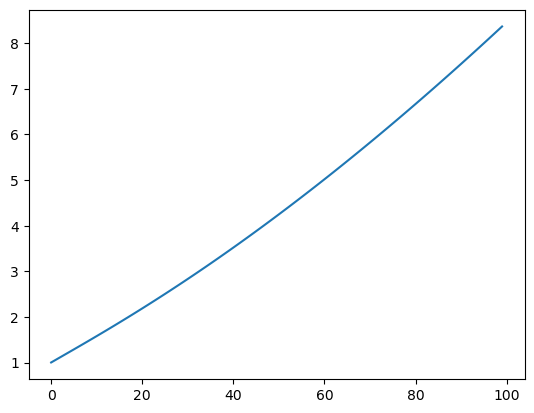

In [136]:
plt.plot(E_z(z, -0.4,1))

In [125]:
omega_m = np.linspace(-1, 1, 100)
omega_lambda = np.linspace(-1,1, 100)

In [126]:
z = np.linspace(0.001,3,100)
fk = f_k(z,omega_m, omega_lambda)

12214.424801400011
12160.534562117877
12106.807798824038
12053.244137989717
11999.84320676741
11946.60463298985
11893.528045168978
11840.61307249491
11787.859344834926
11735.266492732413
11682.834147405876
11630.561940747886
11578.449505324063
11526.496474372072
11474.702481800592
11423.067162188283
11371.590150782802
11320.271083499758
11269.109596921713
11218.10532829717
11167.257915539542
11116.566997226158
11066.032212597269
11015.653201555004
10965.429604662393
10915.361063142343
10865.447218876654
10815.687714404992
10766.08219292391
10716.630298285832
10667.331674998073
10618.185968221816
10569.192823771136
10520.351888111994
10471.662808361267
10423.125232285707
10374.738808301005
10326.503185470772
10278.418013505543
10230.482942761822
10182.697624241064
10135.061709588703
10087.574851093172
10040.236701684924
9993.046914935436
9946.005145056244
9899.111046897964
9852.364275949305
9805.764488336104
9759.311340820344
9713.004490799185
9666.843596304001
9620.82831599939
9574.958

In [127]:
fk

array([[12214.4248014 , 12160.53456212, 12106.80779882, ...,
         7695.43802023,  7655.76275859,  7616.21776508],
       [12160.53456212, 12106.80779882, 12053.24413799, ...,
         7655.76275859,  7616.21776508,  7576.80272763],
       [12106.80779882, 12053.24413799, 11999.84320677, ...,
         7616.21776508,  7576.80272763,  7537.51733478],
       ...,
       [ 7695.43802023,  7655.76275859,  7616.21776508, ...,
         4409.43350133,  4381.02481412,  4352.71872957],
       [ 7655.76275859,  7616.21776508,  7576.80272763, ...,
         4381.02481412,  4352.71872957,  4324.51498852],
       [ 7616.21776508,  7576.80272763,  7537.51733478, ...,
         4352.71872957,  4324.51498852,  4296.41333231]], shape=(100, 100))

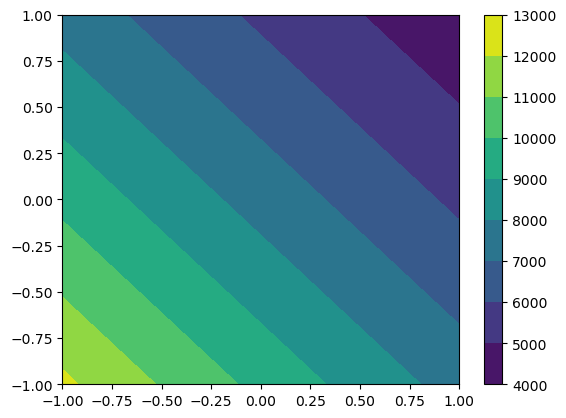

In [128]:
plt.contourf(omega_m, omega_lambda ,fk)
plt.colorbar()

In [37]:
omega_m*omega_lambda.reshape(-1, 1)

array([[ 1.        ,  0.97979798,  0.95959596, ..., -0.95959596,
        -0.97979798, -1.        ],
       [ 0.97979798,  0.96000408,  0.94021018, ..., -0.94021018,
        -0.96000408, -0.97979798],
       [ 0.95959596,  0.94021018,  0.92082441, ..., -0.92082441,
        -0.94021018, -0.95959596],
       ...,
       [-0.95959596, -0.94021018, -0.92082441, ...,  0.92082441,
         0.94021018,  0.95959596],
       [-0.97979798, -0.96000408, -0.94021018, ...,  0.94021018,
         0.96000408,  0.97979798],
       [-1.        , -0.97979798, -0.95959596, ...,  0.95959596,
         0.97979798,  1.        ]], shape=(100, 100))

In [36]:
h

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 2,  4,  6,  8, 10, 12, 14, 16, 18],
       [ 3,  6,  9, 12, 15, 18, 21, 24, 27],
       [ 4,  8, 12, 16, 20, 24, 28, 32, 36],
       [ 5, 10, 15, 20, 25, 30, 35, 40, 45],
       [ 6, 12, 18, 24, 30, 36, 42, 48, 54],
       [ 7, 14, 21, 28, 35, 42, 49, 56, 63],
       [ 8, 16, 24, 32, 40, 48, 56, 64, 72],
       [ 9, 18, 27, 36, 45, 54, 63, 72, 81]])

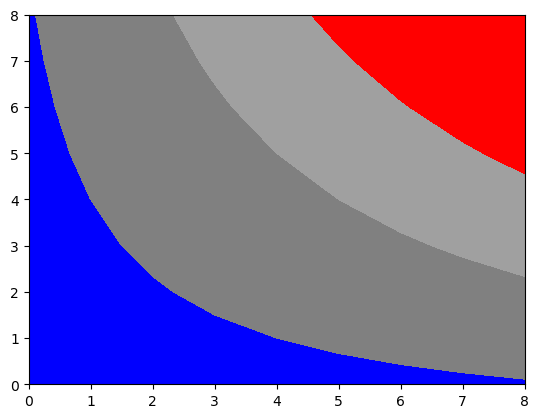

In [25]:
x = np.arange(1, 10)
y = x.reshape(-1, 1)
h = x * y

cs = plt.contourf(h, levels=[10, 30, 50],
    colors=['#808080', '#A0A0A0', '#C0C0C0'], extend='both')
cs.cmap.set_over('red')
cs.cmap.set_under('blue')
cs.changed()